**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 9**
Regresión Logística

---

*   NOMBRE: Fernando Abel Leal Villacicencio
*   MATRÍCULA: A01796859
*   NOMBRE: Carlos Isaac Sagrero Campos
*   MATRÍCULA: A01796826
*   NOMBRE: Oscar F Barajas Matxo
*   MATRÍCULA: A01350763

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data_df = pd.read_csv('data.csv')
data_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# **Parte 1**. EDA

Haz que el `id` sea el índice del dataframe y efectúa una exploración inicial de los datos a través de: 

In [4]:
data_df.set_index('id', inplace=True)
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                 



1a) Estadísticas descriptivas para todas las variables del dataframe. 

In [ ]:
display(data_df.select_dtypes(include=['object']).describe().T)
display(round(data_df.select_dtypes(include=['number']).describe().T, 2))

,count,unique,top,freq
diagnosis,569,2,B,357


,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.13,3.52,6.98,11.70,13.37,15.78,28.11
texture_mean,569.0,19.29,4.30,9.71,16.17,18.84,21.80,39.28
perimeter_mean,569.0,91.97,24.30,43.79,75.17,86.24,104.10,188.50
area_mean,569.0,654.89,351.91,143.50,420.30,551.10,782.70,2501.00
smoothness_mean,569.0,0.10,0.01,0.05,0.09,0.10,0.11,0.16
compactness_mean,569.0,0.10,0.05,0.02,0.06,0.09,0.13,0.35
concavity_mean,569.0,0.09,0.08,0.00,0.03,0.06,0.13,0.43
concave points_mean,569.0,0.05,0.04,0.00,0.02,0.03,0.07,0.20
symmetry_mean,569.0,0.18,0.03,0.11,0.16,0.18,0.20,0.30
fractal_dimension_mean,569.0,0.06,0.01,0.05,0.06,0.06,0.07,0.10


1b) Valores únicos por variable para identificar posibles variables categóricas. 

In [6]:
display(data_df.select_dtypes(include=['object']).nunique())
display(data_df.select_dtypes(include=['number']).nunique())

diagnosis    2
dtype: int64

radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
dtype: int64

1c) Búsqueda de valores faltantes.

In [7]:
display(data_df.select_dtypes(include=['object']).isna().sum())
display(data_df.select_dtypes(include=['number']).isna().sum())

diagnosis    0
dtype: int64

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

1d) Diagrama de barras para determinar la frecuencia de los diagnósticos (cantidad de observaciones con resultado benigno y maligno) 

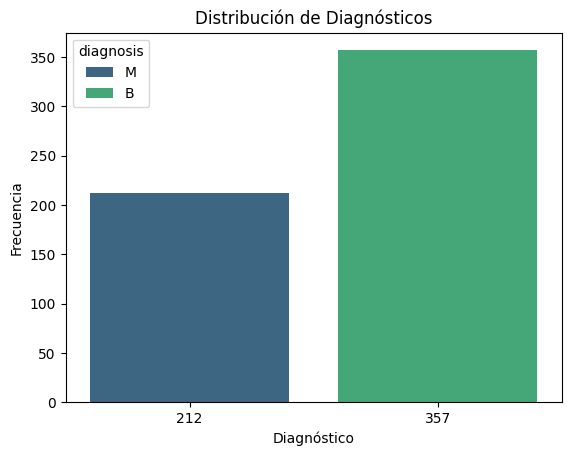

In [ ]:
diagnosis_counts = data_df['diagnosis'].value_counts()

sns.barplot(x=diagnosis_counts, y=diagnosis_counts.values, palette='viridis', hue=diagnosis_counts.index)

plt.xlabel('Diagnóstico')
plt.ylabel('Frecuencia')
plt.title('Distribución de Diagnósticos')
plt.show()

2. Como hay tres valores relacionados con la misma característica (`mean`, `se` y `worst`) es muy probable que exista multicolinealidad en el conjunto. 

La multicolinealidad en regresión es una condición que ocurre cuando algunas variables predictoras están fuertemente correlacionadas entre sí, de tal manera que si se incluyen simultáneamente en un modelo, impiden explicar de manera correcta el efecto que cada una tiene sobre la variable respuesta. Existen muchas formas de analizar si hay colinealidad en los modelos, una de ellas es el alto coeficiente de correlación entre variables.
 
Para observar este efecto, elabora un mapa de calor que cuantifique la correlación de las variables numéricas en el dataframe. 

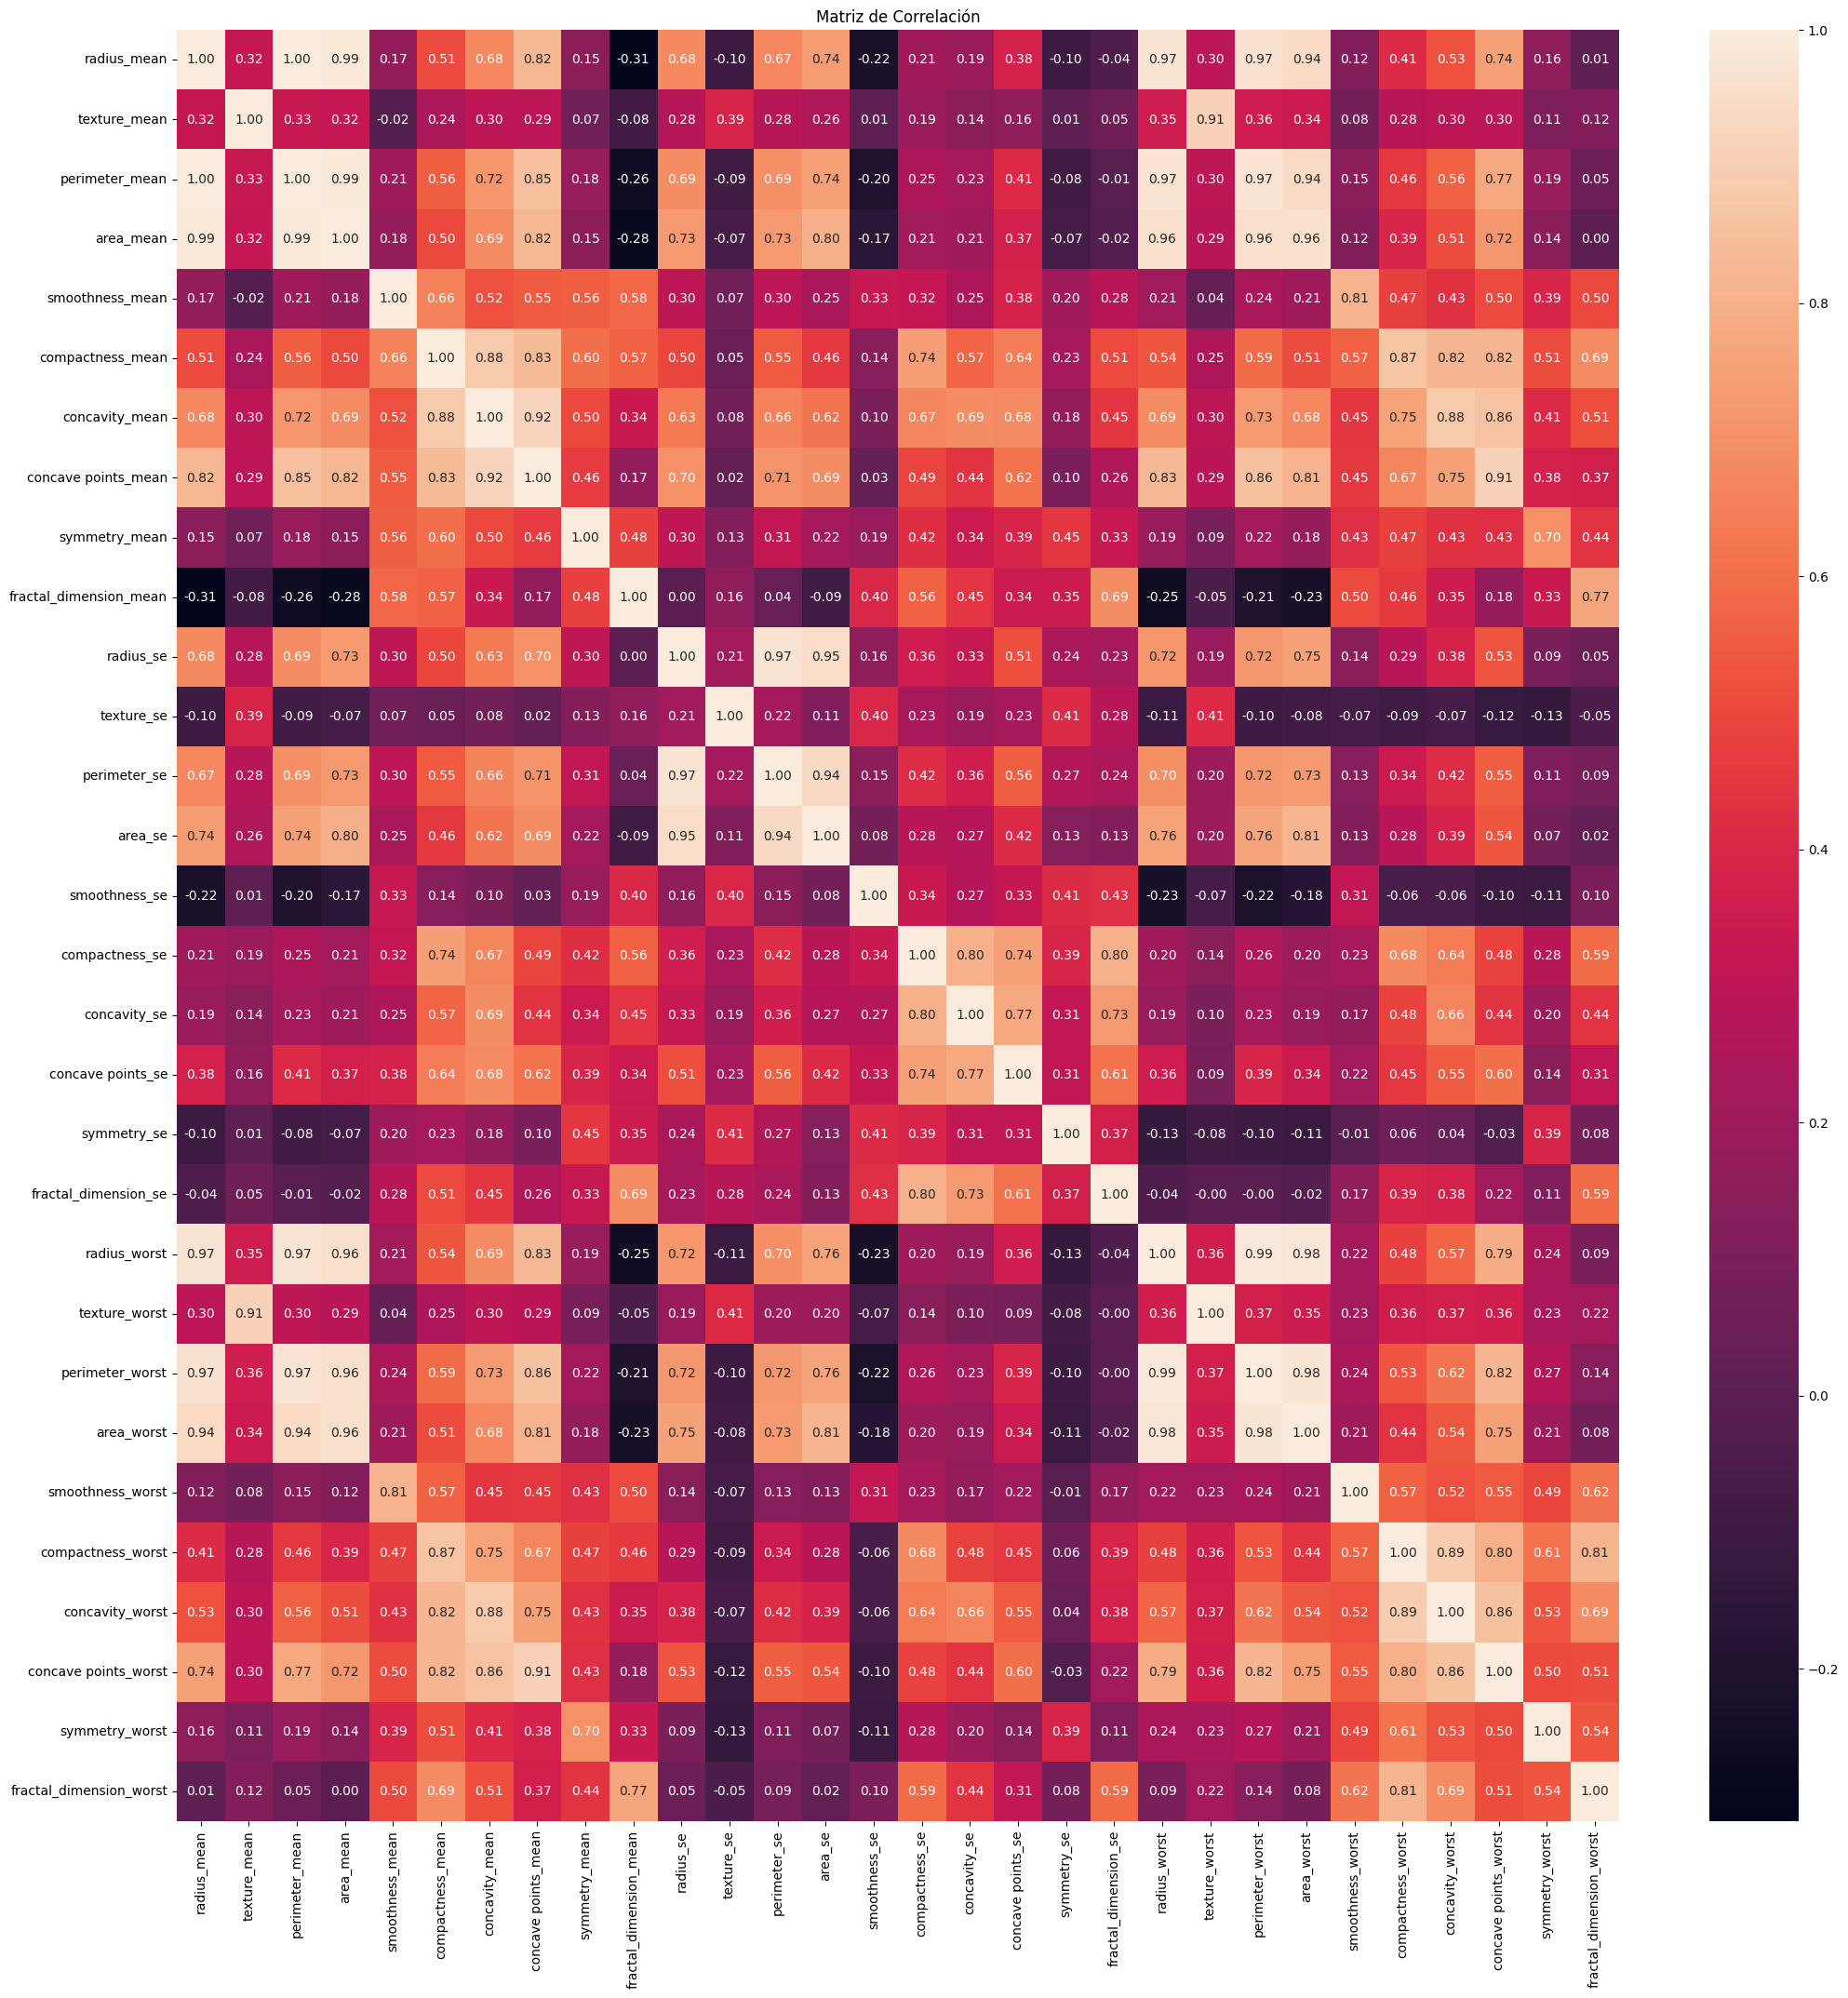

In [9]:
numeric_df = data_df.select_dtypes(include=['number'])

plt.figure(figsize=(25, 25))

sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f")

plt.title('Matriz de Correlación')
plt.show()




Si te fijas en los valores de correlación entre las variables `_mean` y `_worst` es evidente la multicolinearidad. 

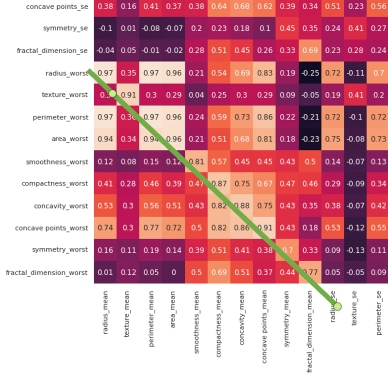

Por ejemplo, la columna `radius_mean` tiene una correlación de 0.97 con la columna `radius_worst`. Esto es algo inevitable, porque las columnas "peores" son esencialmente solo un subconjunto de las columnas "medias". 
 
Para solucionar el problema numérico de la multicolinealidad, tradicionalmente se recurre a eliminar variables o efectuar análisis de componentes principales (PCA) con las `X`’s y usar los componentes como variables independientes en un modelo final.
 
Conduciremos esta actividad en esos dos sentidos.


# **Parte 2**. Modelo con eliminación de variables altamente correlacionadas  

Elimina las variables altamente correlacionadas:

3a) Ahora que sabes que las variables `_mean` y `_worst` tienen correlación alta, hay que quitar del dataframe un conjunto. Borra las columnas `_worst`.

In [10]:
palabra = '_worst'
BK = data_df.copy()
delete_worst = BK.loc[:, ~BK.columns.str.contains(palabra)]
delete_worst.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 842302 to 92751
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   diagnosis               569 non-null    object 
 1   radius_mean             569 non-null    float64
 2   texture_mean            569 non-null    float64
 3   perimeter_mean          569 non-null    float64
 4   area_mean               569 non-null    float64
 5   smoothness_mean         569 non-null    float64
 6   compactness_mean        569 non-null    float64
 7   concavity_mean          569 non-null    float64
 8   concave points_mean     569 non-null    float64
 9   symmetry_mean           569 non-null    float64
 10  fractal_dimension_mean  569 non-null    float64
 11  radius_se               569 non-null    float64
 12  texture_se              569 non-null    float64
 13  perimeter_se            569 non-null    float64
 14  area_se                 569 non-null    

3b. Entre las variables `_mean`, identifica patrones lineales con diagramas de dispersión usando:



```Python
sns.pairplot(data=data_df[['radius_mean', 
        'texture_mean', 
        'perimeter_mean', 
        'area_mean', 
        'smoothness_mean', 
        'compactness_mean', 
        'concavity_mean',
        'concave points_mean', 
        'symmetry_mean', 
        'fractal_dimension_mean']]) 
```




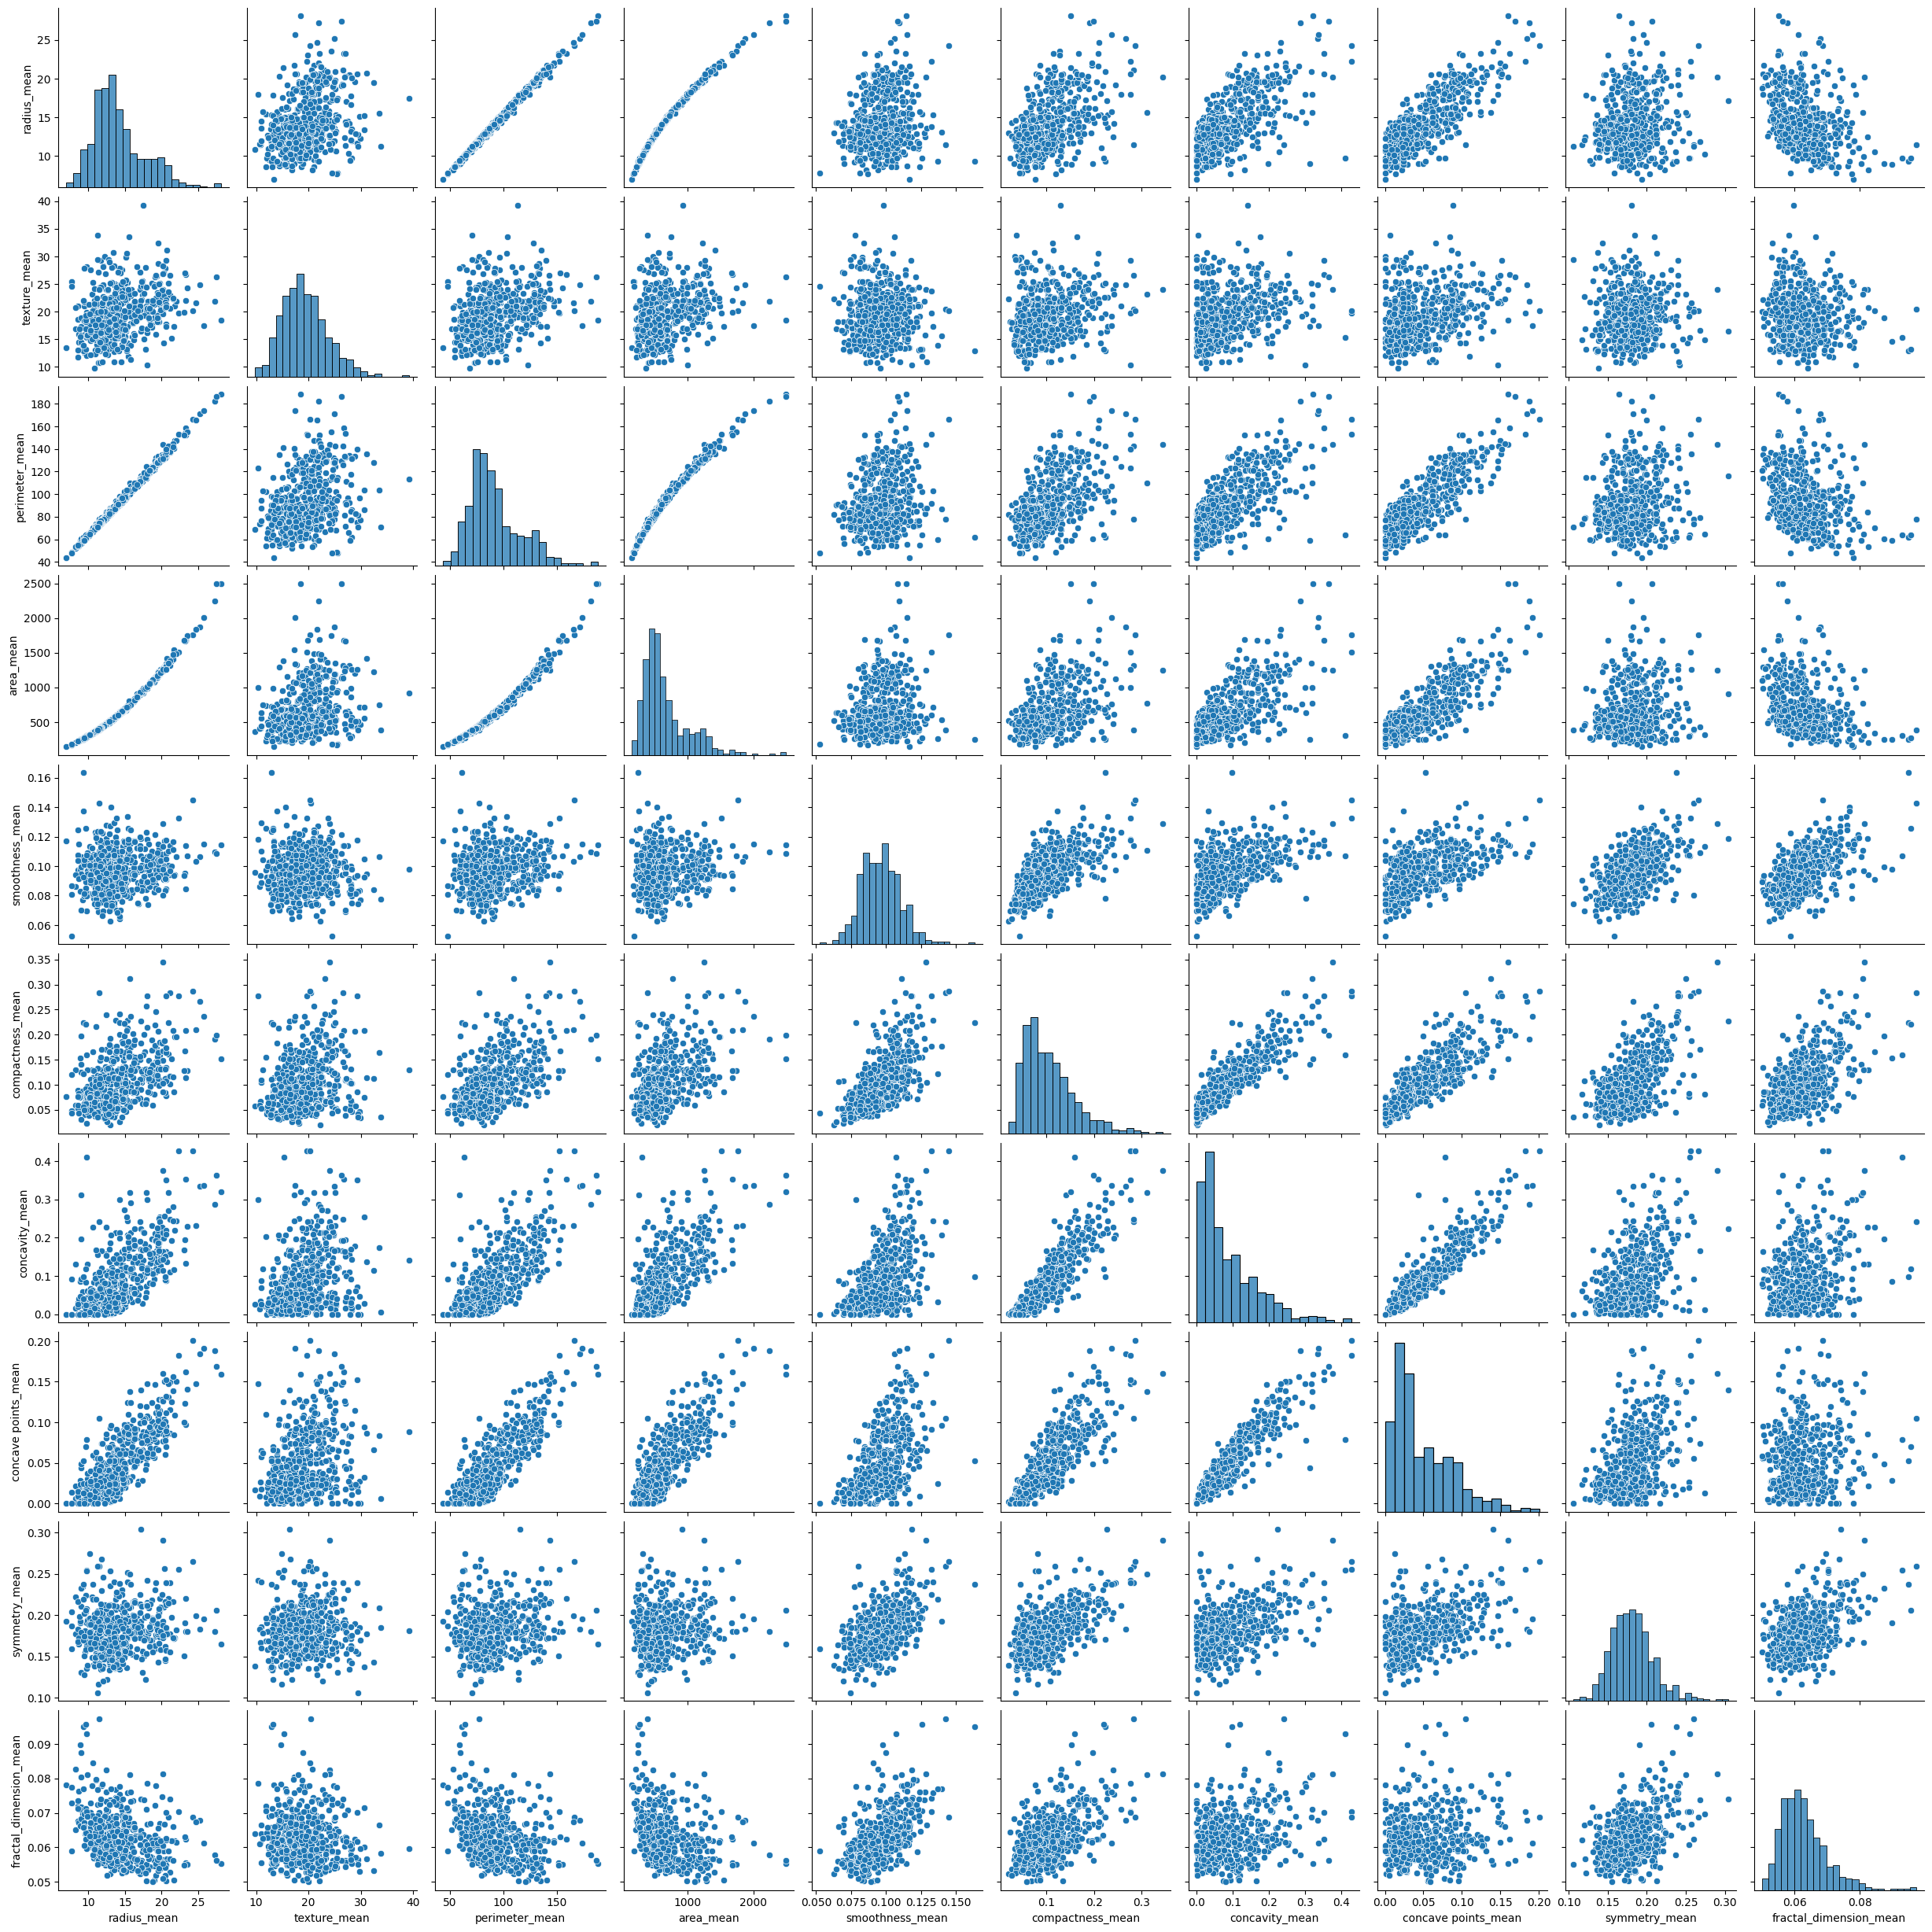

In [11]:
v_mean = [col for col in BK.columns if '_mean' in col]
sns.pairplot(BK[v_mean])
plt.show()

De la matriz podrás observar relaciones lineales bastante evidentes entre:


*   `radius_mean`, `perimeter_mean` y `area_mean`
*   `compactness_mean`, `concavity_mean`, `concave_points_mean`
 
Sabemos que el perímetro y el área de un círculo, se calculan a partir del radio. Entonces, la relación entre las primeras tres variables es muy clara para nosotros. 

3c) Elabora otro mapa de calor confirmar con los valores de correlación.


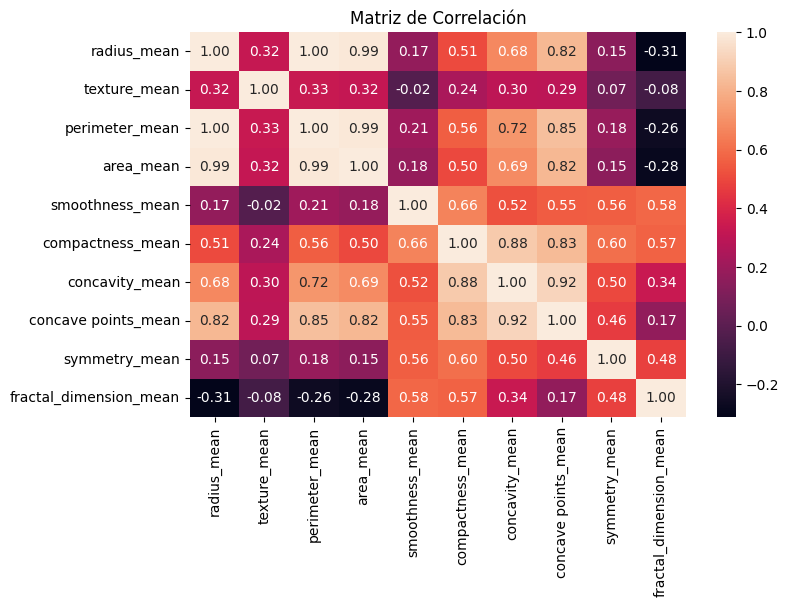

In [12]:
numeric_df = data_df.select_dtypes(include=['number'])

plt.figure(figsize=(8, 5))
sns.heatmap(numeric_df[v_mean].corr(), annot=True, fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

3d) Después de observar los valores, nos quedaremos con sólo una variable de cada trío: `radius_mean` y `compactness_mean`. Elimina las restantes, no sólo del conjunto `_mean`, sino también de `_se`. 

In [13]:
new_mean = [col for col in delete_worst.columns if any(sub in col for sub in ['perimeter', 'area', 'concavity','concave points'])]
dl_height_corr = delete_worst.iloc[:,  ~delete_worst.columns.str.contains('|'.join(new_mean))]

In [14]:
dl_height_corr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 842302 to 92751
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   diagnosis               569 non-null    object 
 1   radius_mean             569 non-null    float64
 2   texture_mean            569 non-null    float64
 3   smoothness_mean         569 non-null    float64
 4   compactness_mean        569 non-null    float64
 5   symmetry_mean           569 non-null    float64
 6   fractal_dimension_mean  569 non-null    float64
 7   radius_se               569 non-null    float64
 8   texture_se              569 non-null    float64
 9   smoothness_se           569 non-null    float64
 10  compactness_se          569 non-null    float64
 11  symmetry_se             569 non-null    float64
 12  fractal_dimension_se    569 non-null    float64
dtypes: float64(12), object(1)
memory usage: 62.2+ KB


Observa la distribución de las variables resultantes (deben ser 12): 

4a) Utilizando histogramas. Guarda en una variable (`skew_cols`) las que tengan marcado sesgo positivo. Para dar seguridad a tu selección, elige aquellas cuyo resultado de aplicar la función `skew()` sea mayor a 1. 

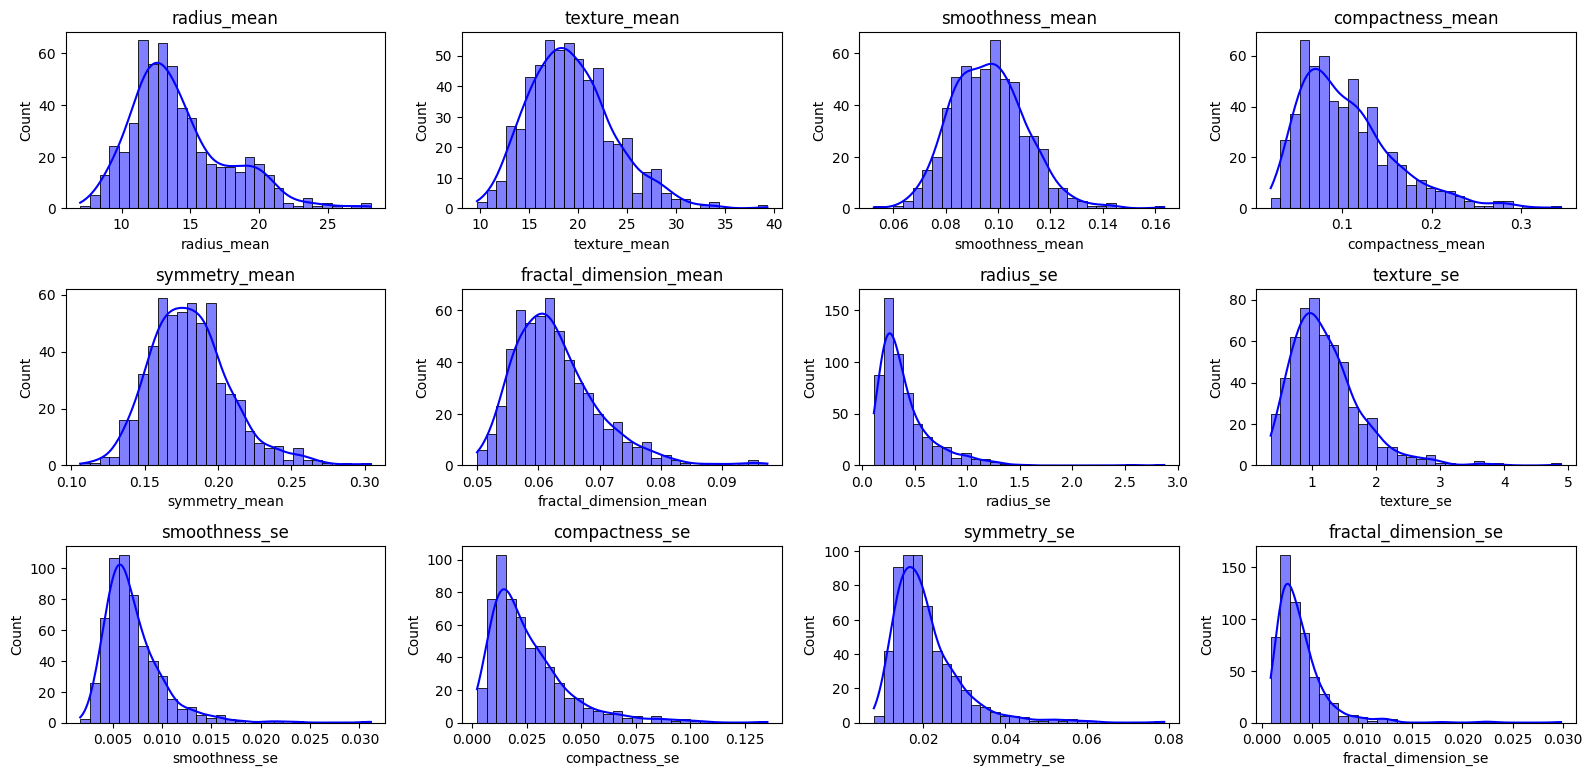

In [15]:
df_num = dl_height_corr.select_dtypes(include=['number']).columns
fig, axes = plt.subplots(4, 4, figsize=(16, 10))
axes = axes.ravel()


for i, col in enumerate(df_num):
    sns.histplot(dl_height_corr[col], kde=True, color='blue', bins=30, ax=axes[i])
    axes[i].set_title(col)

for i in range(len(df_num), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [16]:
skew_cols = []
for i, col in enumerate(df_num):
    a = round(dl_height_corr[col].skew(),2)
    if a > 1:
        print('Asimetría de la Variable:', col, ' - ', a)
        skew_cols.append(col)

Asimetría de la Variable: compactness_mean  -  1.19
Asimetría de la Variable: fractal_dimension_mean  -  1.3
Asimetría de la Variable: radius_se  -  3.09
Asimetría de la Variable: texture_se  -  1.65
Asimetría de la Variable: smoothness_se  -  2.31
Asimetría de la Variable: compactness_se  -  1.9
Asimetría de la Variable: symmetry_se  -  2.2
Asimetría de la Variable: fractal_dimension_se  -  3.92


In [17]:
print(skew_cols)

['compactness_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'smoothness_se', 'compactness_se', 'symmetry_se', 'fractal_dimension_se']


4b) Dibujando box plots de todas las variables. Guarda en una variable (`scale_cols`) aquellas que no se encuentren en el intervalo [0,1]


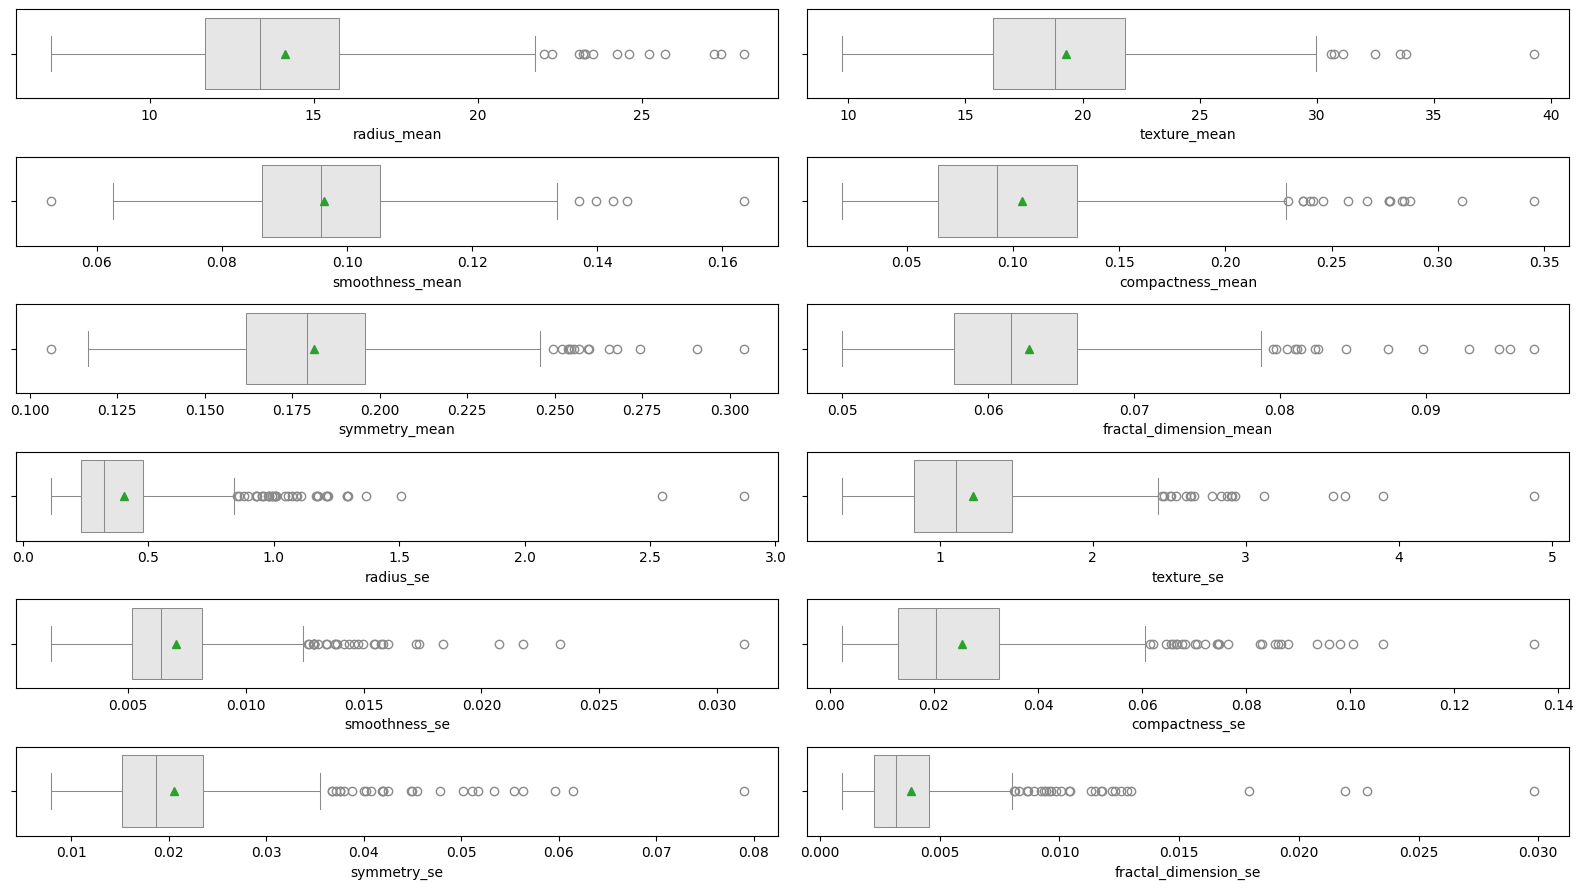

In [18]:
bplot = dl_height_corr.select_dtypes(include=['number'])
figure, axes = plt.subplots(6, 2, figsize=(16, 9))
axes = axes.ravel() 

for i, col in enumerate(bplot.columns):
    sns.boxplot(x=bplot[col], orient='y', ax=axes[i], color='.9', linewidth=.75, showmeans=True)

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


In [19]:
cols_entre_0_y_1 = [col for col in dl_height_corr[df_num] if dl_height_corr[col].between(0, 1).all()]
scale_cols = [col for col in dl_height_corr[df_num] if col not in cols_entre_0_y_1]
print(scale_cols)

['radius_mean', 'texture_mean', 'radius_se', 'texture_se']


Con todo el análisis anterior, estamos listos para generar un modelo *baseline* denominado `logr_model`. Para ello:

5a) Vuelve a leer el contenido del archivo, haz que el `id` sea el índice y separa las variables del dataframe: en `X` coloca los predictores y en `y` la variable de respuesta o salida (`diagnosis`). Divide el conjunto en entrenamiento y prueba (80:20) considerando el parámetro `random_state` con el valor de 1.

In [20]:
#  Importaciones para Preprocesamiento de Datos
from sklearn.preprocessing import MinMaxScaler, StandardScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA

#  Importaciones para División de Datos
from sklearn.model_selection import train_test_split

#  Importaciones para Modelado
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

#  Importaciones para Evaluación del Modelo
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score



In [ ]:
BK = data_df.copy()
BK['diagnosis'] = BK['diagnosis'].replace({'M': 1, 'B': 0}).astype(int)
y = BK['diagnosis']
X = BK.drop(columns='diagnosis')

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=0.8, random_state=1)


5b) Prepara un transformador, denominado `preprocessing`, para borrar las columnas altamente correlacionadas (las 18 variables que se determinaron en los ejercicios previos) Asegúrate de incluir el parámetro `remainder='passthrough'` para mantener el resto de las variables.

In [22]:
delete_worst_df = [col for col in BK.columns if '_worst' in col]
list_delete = delete_worst_df + new_mean
print(len(list_delete))

18


In [23]:
preprocessing = ColumnTransformer(
    transformers=[
        ('dropper', 'drop', list_delete)  # Indicar que estas columnas deben eliminarse
    ],
    remainder='passthrough'
)

5c) Entrena el modelo `logr_model` con el transformador `preprocessing` y  regresión logística. 

Como la salida `y` está en términos de las etiquetas `'B'` y `'M'`, en lugar de 0 y 1, para evaluar el modelo en el conjunto de prueba deberás especificar la clase positiva. En el caso de la matriz de confusión, indica el orden de las etiquetas con `labels=['B','M']`, porque `'B'` es la clase negativa (ésta se especifica primero) y `'M'` la positiva. Para las métricas de *recall* y *precision*, utiliza el parámetro `pos_label='M'`. Como *accuracy* ocupa la suma de ambas clases y el total de las observaciones, no requiere ninguna especificación. Si quisieras omitir estos parámetros, tendrías que sustituir `'B'` por 0 y `'M'` por 1, previo a la construcción del modelo. 

In [24]:

logr_model = make_pipeline(preprocessing, LogisticRegression())
logr_model.fit(Xtrain, ytrain)
predictions = logr_model.predict(Xtest)

In [25]:
print('Confusion matrix:')
print(confusion_matrix(ytest, predictions))
print('Precision =', round(precision_score(ytest, predictions),2))
print('Recall =', round(recall_score(ytest, predictions),2)) 
print('Accuracy:', round(accuracy_score(ytest, predictions), 2))

Confusion matrix:
[[68  4]
 [10 32]]
Precision = 0.89
Recall = 0.76
Accuracy: 0.88


Para generar un modelo `logr_model2` con transformación y escalamiento:

6a) Modifica el transformador anterior para, además del borrado de las columnas correlacionadas, aplicar la raíz cuadrada a los predictores con sesgo (previamente almacenados en `skew_cols`) y escalamiento *MinMax* a los predictores con escala mayor a 1 (previamente almacenados en `scale_cols`) Como no todos los predictores serán eliminados o transformados, asegúrate de incluir el parámetro `remainder='passthrough'` 

In [26]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=0.8, random_state=1)
sqrt_transformer = FunctionTransformer(np.sqrt, validate=False)
scaler = MinMaxScaler()

preprocessing2 = ColumnTransformer(
    transformers=[
        ('dropper', 'drop', list_delete),                
        ('sqrt', sqrt_transformer, skew_cols),            
        ('scaler', scaler, scale_cols),                   
    ],
    remainder='passthrough' 
)

6b) Entrena el modelo `logr_model2` con regresión logística, aplicando previamente el transformador modificado. Evalúa el modelo en el conjunto de prueba con las mismas métricas.

In [27]:
logr_model2 = make_pipeline(preprocessing2, LogisticRegression())
logr_model2.fit(Xtrain, ytrain)
predictions = logr_model2.predict(Xtest)

print('Confusion matrix:')
print(confusion_matrix(ytest, predictions))
print('Precision =', round(precision_score(ytest, predictions),2))
print('Recall =', round(recall_score(ytest, predictions),2)) 
print('Accuracy:', round(accuracy_score(ytest, predictions), 2)) 

Confusion matrix:
[[72  0]
 [11 31]]
Precision = 1.0
Recall = 0.74
Accuracy: 0.9


# **Parte 3**. Modelo con aplicación de PCA 

7. Analizaremos el efecto de aplicar PCA a todas las variables. Recuerda que previo a aplicarlo es recomendado escalar todas las variables. Utiliza la clase `StandardScaler` para transformar `X`.

In [28]:
scaler = StandardScaler()
df_scaler = scaler.fit_transform(X)
df_scaler = pd.DataFrame(df_scaler)
df_scaler

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


8. Aplica PCA al conjunto escalado y determina el número de componentes que explican el 99% de la varianza. 

In [29]:
pca = PCA()
principalComponents = pca.fit_transform(df_scaler)
principalComponents = pd.DataFrame(principalComponents)
principalComponents

varianza_acumulada = np.cumsum(pca.explained_variance_ratio_)
num_componentes_99 = np.argmax(varianza_acumulada >= 0.99) + 1

print(f'Número mínimo de componentes que explican más del 90% de la varianza: {num_componentes_99}')

min_cp = principalComponents.iloc[:, :num_componentes_99]
min_cp

Número mínimo de componentes que explican más del 90% de la varianza: 17


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159370,-0.398407,-0.157118,-0.877402,0.262955,-0.859014,0.103388,-0.690804,-0.601793,0.745116,-0.265471
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358,0.240988,-0.711905,1.106995,0.813120,0.157923,-0.943529,-0.653475,0.008975,-0.648809,-0.017212
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668166,0.097374,0.024066,0.454275,-0.605604,0.124387,-0.410627,0.016680,0.483420,0.325111,0.190918
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429911,1.059565,-1.405440,-1.116975,-1.151514,1.011316,-0.933271,-0.487417,-0.168848,0.051370,0.482634
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936213,0.636376,-0.263805,0.377704,0.651360,-0.110515,0.387948,-0.539181,0.310319,-0.152606,0.133142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,6.439315,-3.576817,2.459487,1.177314,-0.074824,-2.375193,-0.596130,-0.035471,0.987929,0.256989,-0.062651,0.123342,-0.051723,-0.404290,0.652750,0.147642,0.348266
565,3.793382,-3.584048,2.088476,-2.506028,-0.510723,-0.246710,-0.716326,-1.113360,-0.105207,-0.108632,0.244804,0.222753,-0.192637,0.015555,-0.069975,-0.138184,0.293495
566,1.256179,-1.902297,0.562731,-2.089227,1.809991,-0.534447,-0.192758,0.341887,0.393917,0.520877,-0.840512,0.096473,0.157418,0.285691,0.090998,-0.232648,-0.065615
567,10.374794,1.672010,-1.877029,-2.356031,-0.033742,0.567936,0.223082,-0.280239,-0.542035,-0.089296,-0.178628,-0.697461,1.225195,0.218698,0.229591,-0.061047,-0.168514


9. Con el número de componentes determinado, estamos listos para generar un modelo `logr_model3` con PCA. Construye un pipeline que incluya el escalamiento estándar, el PCA con el número de componentes determinado y regresión logística. Entrena el modelo utilizando el  conjunto de entrenamiento y evalúalo en el conjunto de prueba con las mismas métricas.

In [30]:
logr_model3 = make_pipeline(scaler, PCA(n_components=num_componentes_99), LogisticRegression())
logr_model3.fit(Xtrain, ytrain)
predictions = logr_model3.predict(Xtest)

print('Confusion matrix:')
print(confusion_matrix(ytest, predictions)) 
print('Precision =', round(precision_score(ytest, predictions),2))
print('Recall =', round(recall_score(ytest, predictions),2))
print('Accuracy:', round(accuracy_score(ytest, predictions), 2))

Confusion matrix:
[[72  0]
 [ 2 40]]
Precision = 1.0
Recall = 0.95
Accuracy: 0.98


10. En un modelo de diagnóstico médico, ¿cuál consideras que es la métrica más importante? ¿Cómo cambiarías (disminuir/aumentar) el *threshold*? ¿Por qué? 

|          |Precision|Recall|Accuracy|
|----------|-----------|--------|----------|
| Modelo 1 | 0.89      | 0.76   | 0.88     |
| Modelo 2 | 1.00      | 0.74   | 0.90     |
| Modelo 3 | 1.00      | 0.95   | 0.98     |




Analizando la tabla anterior con los resultados obtenidos, la sensibilidad (recall) podría ser la métrica más prioritaria, ya que indica qué tan bien el modelo detecta los casos malignos.

Queremos minimizar los falsos negativos (tumores malignos clasificados erróneamente como benignos), ya que no detectar un cáncer a tiempo puede ser fatal. Por otro lado, un falso positivo (un tumor benigno clasificado como maligno) puede generar ansiedad y pruebas adicionales, pero es menos grave que un falso negativo.

Al analizar la tabla, observamos que el Modelo 3 tiene el mejor recall (0.95), lo que significa que detecta la mayoría de los casos malignos, reduciendo la posibilidad de falsos negativos. Aunque el Modelo 2 tiene una precisión perfecta (1.00), su recall es menor (0.74), lo que implica que podría estar clasificando erróneamente algunos casos malignos como benignos.

Si queremos aumentar la sensibilidad (recall) para detectar más casos malignos:

Disminuimos el threshold (por debajo de 0.5), esto clasifica más casos como malignos, reduciendo los falsos negativos, pero como consecuencia habrá más falsos positivos, pero es un riesgo aceptable en este contexto.
Si quisiéramos mejorar la precisión (minimizar falsos positivos) aumentamos el threshold (por encima de 0.5), esto clasifica menos casos como malignos, sin embargo, más falsos negativos, lo cual es peligroso en este caso.
Dado que el Modelo 3 logra un balance con alta precisión (1.00) y un recall de 0.95, es la mejor opción para este escenario. 